# Regressão Linear Múltipla

Objetivos:

  Este documento tem como objetivo principal o estudo da relação entre as variáveis do banco de dados dos primeiros 10 minutos das partidas do jogo online conhecido mundialmente, League of Legends. Com o uso da técnica da regressão linear, é possível definir quais atributos geram mais vantagem ou desvantagem para uma das equipes. Esta análise é de profunda importância quando se está em um ambiente competitivo, pois ao saber o que lhe deixará na frente dos seus inimigos, o jogador pode guiar suas ações de acordo com o que foi encontrado na análise para ficar sempre na frente dos outros competidores.

  Essas informações geram o "meta" do jogo. O “meta” é o padrão de ações mais eficiente e que deverá ser seguido durante a partida. Sendo assim, ao se utilizar de técnicas cada vez mais profundas de análise, o jogo passa a ficar cada vez mais complexo, e o conhecimento cada vez mais difícil de ser obtido. Desta forma, podemos dizer que a obtenção desse conhecimento é ainda mais eficaz, pois não é uma informação tão simples de ser obtida pelo jogador comum.

  Neste documento, temos como foco descobrir se é possível prever o número de mortes do time azul a partir das variáveis explicativas. Como um número de mortes alto normalmente está associado ao time que está atrás, e ao realizarmos tal análise, podemos descobrir o quanto exatamente uma das equipes está prejudicada no jogo.

Variável quantitativa de interesse: 
* blueDeaths (Mortes do time Azul)

Variáveis explicativas: 
* blueWardsPlaced (Sentinelas posicionadas pelo time Azul)
* blueKills (Abates realizados pelo time Azul)
* blueElitblueEliteMonsters (Monstros Épicos derrotado pelo time Azul)
* blueGoldDiff (Diferença de ouro do time Azul)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



Filtrando as variáveis de interesse

In [ ]:
url_lol = 'https://raw.githubusercontent.com/michellyrds/mqaa/master/datasets/high_diamond_ranked_10min.csv'

url = url_lol
raw_data = pd.read_csv(url)

df_raw = raw_data.filter(['blueWardsPlaced', 'blueKills', 'blueDeaths', 'blueEliteMonsters', 'blueGoldDiff'], axis=1)

df = df_raw.rename(columns={'blueWardsPlaced' : 'azulSentinelas', 
                            'blueKills' : 'azulAbates',
                            'blueDeaths' : 'azulMortes', 
                            'blueEliteMonsters' : 'azulMonstrosEpicos', 
                            'blueGoldDiff' : 'azulDiferencaOuros'})


In [ ]:
df.head(10)

,azulSentinelas,azulAbates,azulMortes,azulMonstrosEpicos,azulDiferencaOuros
0,28,9,6,0,643
1,12,5,5,0,-2908
2,15,7,11,1,-1172
3,43,4,5,1,-1321
4,75,6,6,0,-1004
5,18,5,3,1,698
6,18,7,6,1,2411
7,16,5,13,0,-2615
8,16,7,7,0,-1979
9,13,4,5,1,-1548


Separamos o dataset em dois conjuntos: Treinamento e teste.
Depois separamos o dataset de treinamento nas váriaveis explicativas da variável aleatória de interesse ("blueDeaths")

In [ ]:

train, test = train_test_split(df, test_size=0.2)

x = train.filter(['azulSentinelas', 'azulAbates', 'azulMonstrosEpicos', 'azulDiferencaOuros'])
y = train.filter(['azulMortes'])



In [ ]:
y.head(10)

,azulMortes
5941,6
6955,9
163,6
5416,5
3109,6
5120,6
140,9
9472,6
5992,8
3873,16


Criamos o modelo da regressão linear múltipla

In [ ]:
model = LinearRegression().fit(x, y)

In [ ]:
print(model.coef_)

[[ 0.00089959  0.7194373  -0.1069605  -0.00134058]]


In [ ]:
print(model.intercept_)

[1.73574819]


#### Testando o modelo

Dando 4 váriaveis ('blueWardsPlaced', 'blueKills', 'blueEliteMonsters' e 'blueGoldDiff') para estimar o número de mortes do time azul: 

Alguns testes com as 2 amostras do dataframe

In [ ]:
x_to_pred = pd.DataFrame([28, 9, 0, 643]).T

Y = 6
y_pred = model.predict(x_to_pred)

print("Valor real: {} \nValor predito pelo modelo: {}".format(Y,y_pred))

Valor real: 6 
Valor predito pelo modelo: [[7.38580455]]


In [ ]:
x_to_pred_2 = pd.DataFrame([16, 5,0 ,-2615]).T

Y = 13
y_pred = model.predict(x_to_pred_2)

print("Valor real: {} \nValor predito pelo modelo: {}".format(Y,y_pred))

Valor real: 13 
Valor predito pelo modelo: [[8.83376817]]


Criamos o array de predição do conjunto de testes e depois comparamos com o array da variavél aleatória de interesse, identificando que de fato possuem certa similaridade.

In [ ]:
x_test = test.filter(['azulSentinelas', 'azulAbates', 'azulMonstrosEpicos', 'azulDiferencaOuros'])
y_test = test.filter(['azulMortes'])

y_test_pred = pd.DataFrame(model.predict(x_test))

y_test_pred.head(10)


,0
0,6.717345
1,7.275415
2,5.710397
3,7.681482
4,5.600924
5,8.160535
6,5.942945
7,5.322840
8,4.321310
9,9.178826


In [ ]:
y_test.head(10)

,azulMortes
7068,6
3786,5
26,6
367,8
7297,4
707,9
282,5
176,5
260,5
7224,9


## Qualidade do ajustamento



### Coeficiente de determinação

In [ ]:
r_sq = model.score(x, y)
print("Coeficiente de determinação: {}".format(r_sq))

Coeficiente de determinação: 0.721408989147467


### Análise de correlação


In [ ]:
correlation_coefficient = np.corrcoef(x)
print("Coeficiente de correlação: \n{}".format(correlation_coefficient))

Coeficiente de correlação: 
[[ 1.         -0.98225498 -0.97687203 ...  0.98432402 -0.98198531
  -0.98265932]
 [-0.98225498  1.          0.99964011 ... -0.99993512  0.99999804
   0.99999755]
 [-0.97687203  0.99964011  1.         ... -0.99927078  0.99967546
   0.99957919]
 ...
 [ 0.98432402 -0.99993512 -0.99927078 ...  1.         -0.99991601
  -0.99995703]
 [-0.98198531  0.99999804  0.99967546 ... -0.99991601  1.
   0.99999311]
 [-0.98265932  0.99999755  0.99957919 ... -0.99995703  0.99999311
   1.        ]]


Calculando os coeficientes de correlação múltiplo:

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,azulSentinelas,azulAbates,azulMortes,azulMonstrosEpicos,azulDiferencaOuros
azulSentinelas,1.000000,0.018138,-0.002612,0.019892,0.015800
azulAbates,0.018138,1.000000,0.004044,0.178540,0.654148
azulMortes,-0.002612,0.004044,1.000000,-0.204764,-0.640000
azulMonstrosEpicos,0.019892,0.178540,-0.204764,1.000000,0.281464
azulDiferencaOuros,0.015800,0.654148,-0.640000,0.281464,1.000000


Outra forma de visualizar os coeficientes de correlação:

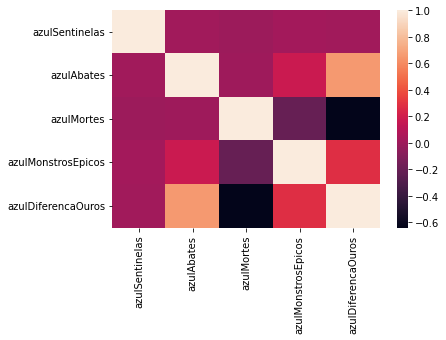

In [ ]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## Análise dos resíduos

TO DO

## Interpretação dos Resultados

É possível observar alguns pontos nos resultados obtidos pela regressão linear múltipla. Com a definição da variável quantativa de interesse e as variáveis explicativas, pela execução de modelo de regressão linear nas duas amostras do dataframe utilizando as 4 variáveis ('blueWardsPlaced', 'blueKills', 'blueEliteMonsters' e 'blueGoldDiff') para prever o numero de mortes do time azul foi possível verificar que em um dos testes o resultado foi próximo do real (valor real 6, enquanto que o valor predito pelo modelo foi próximo a 7.3842). No segundo teste o valor predito teve uma distância maior, sendo o valor real 13 tendo o valor obtido próxima a 8,853. Porém, quando observamos uma amostra maior do conjunto de predições ao lado do conjunto de teste, pode-se verificar a proximidade entre os resultados preditos pelo modelo e o conjunto de testes.

Um forte indicador de que nosso modelo é um bom modelo é o coeficiente de determinação, que para o nosso modelo de regressão possui um valor de aproximadamente 0,72387.

Outro ponto interessante que também podemos verificar é a matriz dos coeficientes de correlação que temos uma maior clareza de quais variáveis exlpicativas que possuem uma correlação maior com a variável quantitativa de interesse (blueDeaths) são a blueGoldDiff (-0,204764) e a blueEliteMonsters (-0,64).

**Conclusão:**

Como apresentado na interpretação dos resultados, nós conseguimos identificar qual dos fatores escolhidos é o que mais está relacionado à quantidade de mortes da equipe azul, que nesse caso, foi o ‘azulDiferencaOuros’. Também foi possível observar o impacto das outras variáveis, que não se demonstraram tão expressivas, com a exceção da ‘azulAbates’, que também demonstrou um grande impacto.

Desta forma, o objetivo proposto no documento foi cumprido, e esta análise pôde ser aplicada dentro de jogo. Pelos resultados, obter uma vantagem de golds (ouros, em inglês) e procurar abater outros jogadores, devem ser o foco dos jogadores nos 10 primeiros minutos de partida, visto que esses dois pontos apontados são os que mais impactaram no número de mortes.

## Referências

https://realpython.com/linear-regression-in-python/#multiple-linear-regression

https://stackabuse.com/calculating-pearson-correlation-coefficient-in-python-with-numpy/

https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/08_correlation.html

https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas


